<a href="https://colab.research.google.com/github/pratham655/AI-ML-WORKSHOP/blob/main/CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from zipfile import ZipFile
file_name = "/content/drive/MyDrive/Cat & Dog .zip"
with ZipFile(file_name,'r') as zip:
  zip.extractall()
  print('finish')

finish


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import tensorflow
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import*

In [ ]:
train_datagen=ImageDataGenerator(rescale=1./255,shear_range=0.2,zoom_range=0.2,horizontal_flip=True)

In [ ]:
text_datagen=ImageDataGenerator(rescale=1./255)

In [ ]:
training_set=train_datagen.flow_from_directory('/content/cats_dogs/train',target_size=(64,64),batch_size=32,class_mode='binary')

Found 8000 images belonging to 2 classes.


In [ ]:
test_set = text_datagen.flow_from_directory ('/content/cats_dogs/test', target_size= (64, 64), batch_size= 32, class_mode= 'binary')

Found 2000 images belonging to 2 classes.


In [ ]:
model=Sequential()
model.add(Conv2D(32,(3,3),input_shape=(64,64,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.3))
model.add(Conv2D(128,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))
model.add(Flatten())
model.add(Dense(1,activation='sigmoid'))
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
model.fit(training_set,epochs=15,steps_per_epoch=8000//32,validation_steps=2000//32,validation_data=test_set)

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/15
250/250 ━━━━━━━━━━━━━━━━━━━━ 34s 104ms/step - accuracy: 0.5111 - loss: 0.6999 - val_accuracy: 0.5580 - val_loss: 0.6700
Epoch 2/15
250/250 ━━━━━━━━━━━━━━━━━━━━ 24s 97ms/step - accuracy: 0.5840 - loss: 0.6785 - val_accuracy: 0.6205 - val_loss: 0.6545
Epoch 3/15
250/250 ━━━━━━━━━━━━━━━━━━━━ 25s 101ms/step - accuracy: 0.6634 - loss: 0.6134 - val_accuracy: 0.6759 - val_loss: 0.5975
Epoch 4/15
250/250 ━━━━━━━━━━━━━━━━━━━━ 41s 101ms/step - accuracy: 0.6948 - loss: 0.5876 - val_accuracy: 0.7253 - val_loss: 0.5438
Epoch 5/15
250/250 ━━━━━━━━━━━━━━━━━━━━ 26s 102ms/step - accuracy: 0.7140 - loss: 0.5516 - val_accuracy: 0.7077 - val_loss: 0.5567
Epoch 6/15
250/250 ━━━━━━━━━━━━━━━━━━━━ 26s 103ms/step - accuracy: 0.7190 - loss: 0.5444 - val_accuracy: 0.7314 - val_loss: 0.5273
Epoch 7/15
250/250 ━━━━━━━━━━━━━━━━━━━━ 41s 164ms/step - accuracy: 0.7412 - loss: 0.5190 - val_accuracy: 0.7475 - val_loss: 0.5026
Epoch 8/15
250/250 ━━━━━━━━━━━━━━━━━━━━ 26s 103ms/step - accuracy: 0.7542 - loss: 0.

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 609ms/step
[[1.]]


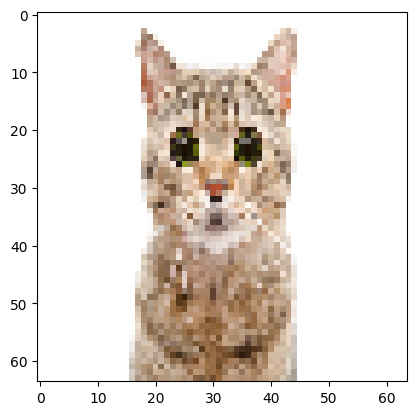

In [ ]:
import cv2
import matplotlib.pyplot as plt
img=cv2.imread('/content/cat_1 - Copy.jpg.jpeg')
img=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
img=cv2.resize(img,(64,64))
print(model.predict(np.array([img])))
plt.imshow(img)
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
[[1.]]


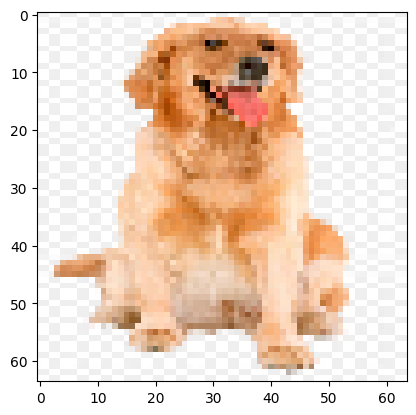

In [ ]:
import cv2
import matplotlib.pyplot as plt
img=cv2.imread('/content/dog_2.webp')
img=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
img=cv2.resize(img,(64,64))
print(model.predict(np.array([img])))
plt.imshow(img)
plt.show()

In [ ]:
y_true=test_set.classes
y_pred_prob=model.predict(test_set)
y_pred=(y_pred_prob>0.5).astype(int)
from sklearn.metrics import confusion_matrix,accuracy_score
cm=confusion_matrix(y_true,y_pred)
acc=accuracy_score(y_true,y_pred)


63/63 ━━━━━━━━━━━━━━━━━━━━ 6s 79ms/step


In [ ]:
acc

0.4975

In [ ]:
cm

array([[490, 510],
       [495, 505]])